<a href="https://colab.research.google.com/github/LeonardoClemente23/quarentenadados-Alura/blob/main/Aula_02_desafios_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# lê a base de dados
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# muda o título das colunas
filmes.columns = ["filmeId", "titulo", "generos"]

# mostra as primeiras linhas do dataframe
filmes.tail()


,filmeId,titulo,generos
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [ ]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# tira a média das notas por filme
media_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

# junta os filmes as suas respectivas médias.
filmes_com_media = filmes.join(media_por_filme,on = "filmeId")
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.sort_values(by="nota_media",ascending=False)


,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [ ]:
notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media_e_total = filmes_com_media.join(notas_por_filme, on = "filmeId")

filmes_com_media_e_total = filmes_com_media_e_total.rename(columns={'nota': 'total_avaliacoes'})
filmes_com_media_e_total


,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

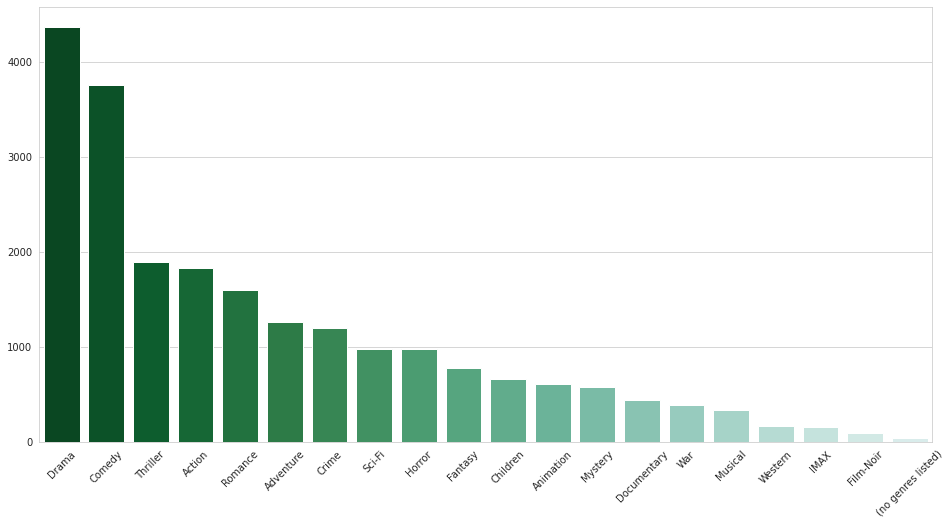

In [ ]:
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

# rotaciona os nomes dos generos
plt.xticks(rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [ ]:
def plot_filme(n):
  '''
  -> Plota um histograma e um gráfico de caixa das notas do filme de ID n e
  retorna um describe do Pandas

  -> Parâmetros:
          n: ID do filme que será analizado
  
  -> Return:
          describe do Pandas 
  '''
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  nome_filme = filmes.query(f"filmeId=={n}")["titulo"].values
  
  print("Filme: ",nome_filme[0])
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  
  return notas_do_filme.describe()

Filme:  Star Wars: Episode IV - A New Hope (1977)


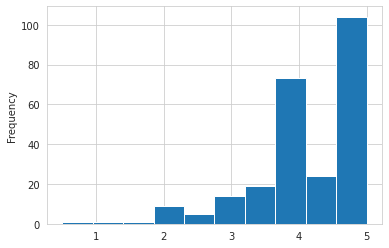

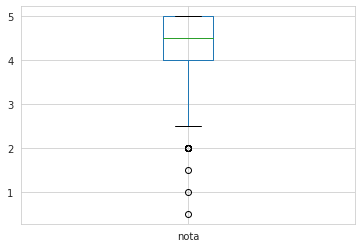

count    251.000000
mean       4.231076
std        0.872004
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [ ]:
plot_filme(260)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [ ]:
top10_mais_votos = filmes_com_media_e_total.sort_values("total_avaliacoes",
                                                        ascending=False).head(10)
top10_mais_votos_titulos = top10_mais_votos["titulo"].to_list()
top10_mais_votos_ids = top10_mais_votos['filmeId'].to_list()
print(top10_mais_votos_titulos)
print(top10_mais_votos_ids)

['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)', 'Braveheart (1995)', 'Terminator 2: Judgment Day (1991)', "Schindler's List (1993)"]
[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]


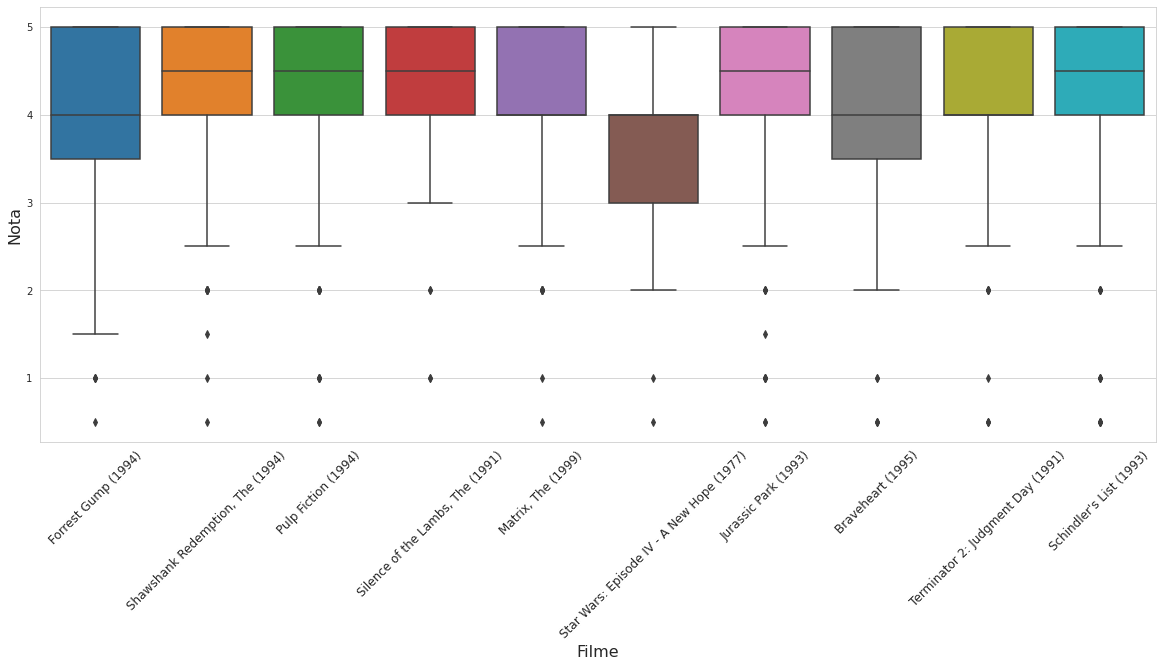

In [ ]:
plt.figure(figsize=(20,8))
cx = sns.boxplot(data=avaliacoes.query("filmeId in @top10_mais_votos_ids"),
            x="filmeId", y="nota")

# Montagem do boxplot
cx.set_xticklabels(top10_mais_votos_titulos, fontsize=12)
cx.set_xlabel("Filme", fontsize=16)
cx.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.


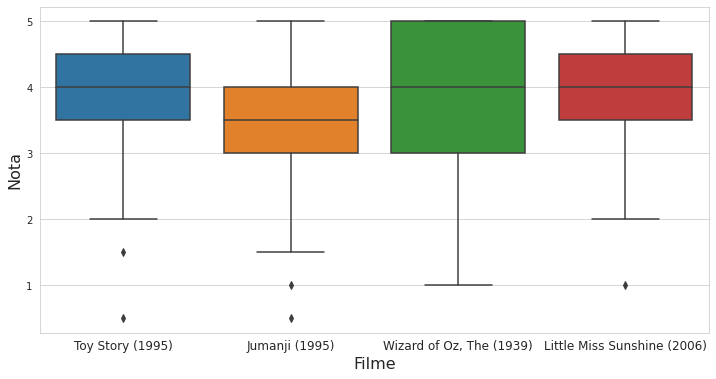

In [ ]:
# Maneira Alura
# Foi feito algo parecido na questão 3
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [ ]:
# Moda das notas de cada filme
moda_filmes = avaliacoes.groupby("filmeId")["nota"].agg(pd.Series.mode)

# Mediana das notas de cada filme
mediana_filmes = avaliacoes.groupby("filmeId")["nota"].median()

# Monta um novo dataframe com a moda a média e a mediana de cada filme
est_filmes = filmes_com_media.join(moda_filmes, on = "filmeId")
est_filmes = est_filmes.rename(columns={"nota":"nota_moda"})
basic_est_filmes = est_filmes.join(mediana_filmes, on = "filmeId")
basic_est_filmes = basic_est_filmes.rename(columns={"nota":"nota_mediana"})


In [ ]:
basic_est_filmes

,filmeId,titulo,generos,nota_media,nota_moda,nota_mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,4,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3,3.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.5,3.5
9739,193585,Flint (2017),Drama,3.500000,3.5,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.5,3.5


In [ ]:

def explora_filme(filme_id):
  """
  -> Mostra a moda, média e mediana de um filme do dataframe. Não retorna nada

  -> Parâmetro:
        filme_id: ID do filme a ser analisado
  """
  filme = basic_est_filmes.query(f'filmeId == {filme_id}')
  
  print(f"Filme: {filme.iloc[0][1]}")
  print()
  print(f"Moda: {filme.iloc[0][4]}")
  print(f"Média: {filme.iloc[0][3].round(2)}")
  print(f"Mediana: {filme.iloc[0][5]}")
  print("-"*10)


In [ ]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: 0.5
Média: 0.8
Mediana: 0.5
----------
Filme: Pearl Jam Twenty (2011)

Moda: 0.5
Média: 0.5
Mediana: 0.5
----------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
----------


In [ ]:
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

Filme: Condorman (1981)

Moda: 4.0
Média: 3.33
Mediana: 4.0
----------
Filme: 100 Girls (2000)

Moda: 3.5
Média: 3.25
Mediana: 3.5
----------
Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.12
Mediana: 3.25
----------


In [ ]:
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75
----------
Filme: Paths of Glory (1957)

Moda: 5.0
Média: 4.54
Mediana: 4.75
----------
Filme: Yi Yi (2000)

Moda: 5.0
Média: 4.6
Mediana: 5.0
----------


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


In [ ]:
def plot_filme_sbs(n):
  '''
  -> Plota um histograma e um gráfico de caixa, lado a lado, das notas do filme 
  de ID n e retorna um describe do Pandas

  -> Parâmetros:
          n: ID do filme que será analizado
  
  -> Return:
          describe do Pandas 
  '''
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  nome_filme = filmes.query(f"filmeId=={n}")["titulo"].values
  
  print("Filme: ",nome_filme[0])
  f, axes = plt.subplots(1, 2, figsize=(16, 6))
  notas_do_filme.plot(kind='hist', ax=axes[0])
  notas_do_filme.plot(kind='box', ax=axes[1])
  plt.tight_layout()

  return notas_do_filme.describe()

Filme:  Star Wars: Episode IV - A New Hope (1977)


count    251.000000
mean       4.231076
std        0.872004
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

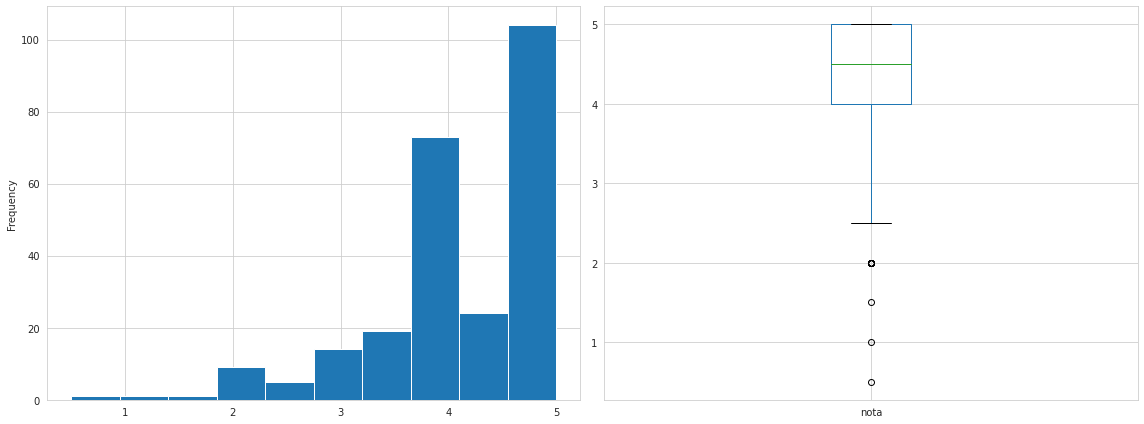

In [ ]:
plot_filme_sbs(260)


## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [ ]:
# Cria uma cópia do datafrme
filmes_com_media_e_ano = filmes_com_media.copy()

# Cria uma nova coluna no dataframe e extrai o ano do título 
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017
9739,193585,Flint (2017),Drama,3.500000,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018


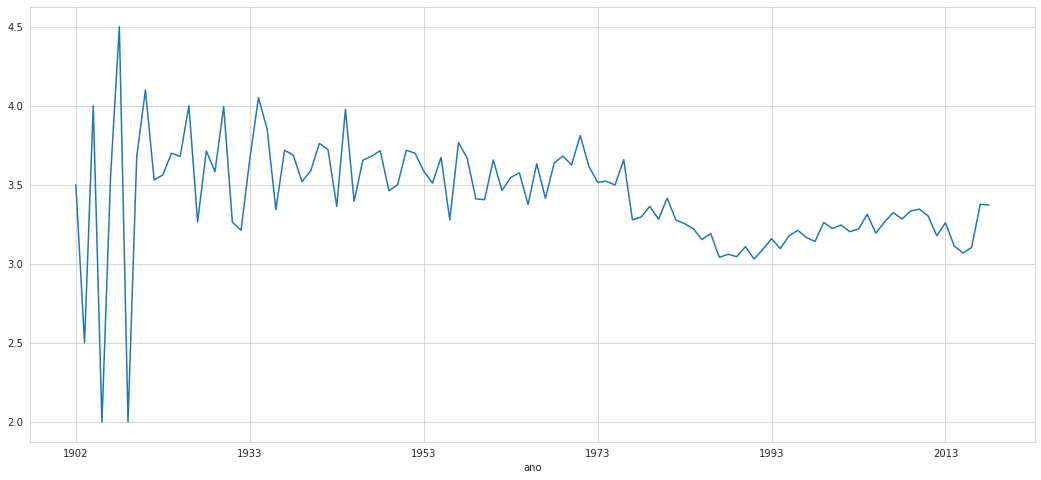

In [ ]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()